In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 10.5 MB/s eta 0:00:00


In [ ]:
!pip install roboflow supervision opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Abdometric object detection technique on fetal ultrasound

from ultralytics import YOLO
import supervision as sv
import cv2
import numpy as np

'''
This part of the code helps in importing the dataset from Roboflow.
'''

from roboflow import Roboflow
rf = Roboflow(api_key="ok9UwirNN5oKTwWZlfMu")
project = rf.workspace("khnsakhnm").project("abdomcirc-e1niv-aeg4o")
version = project.version(1)
dataset = version.download("yolov8")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Abdomcirc-1 in yolov8:: 100%|██████████| 1179/1179 [00:00<00:00, 3003.70it/s]


In [ ]:
import os
import shutil


'''
This part of the code is used to remove empty labels from the dataset.
'''

source = "/content/Abdomcirc-1/train/labels"
destination = "/content/empty_labels"

os.makedirs(destination, exist_ok=True)

for filename in os.listdir(source):
    source_path = os.path.join(source, filename)
    destination_path = os.path.join(destination, filename)

    if os.stat(source_path).st_size == 0:
      shutil.move(source_path, destination_path)

In [ ]:
'''
This part of the code fixed the image extention of the dataset as all the
images are in png or jpg format
'''

source = "/content/Abdomcirc-1/train/images"
destination = "/content/empty_labels"
destination_images = "/content/moved_images"

os.makedirs(destination_images, exist_ok = True)

for filename in os.listdir(destination):
  empty_label_filename = os.path.join(destination, filename)
  base_filename = os.path.splitext(filename)[0]
  image_filename = base_filename + ".jpg"
  image_path = os.path.join(source, image_filename)

  if os.path.exists(image_path):
    destination_image_path = os.path.join(destination_images, image_filename)
    shutil.move(image_path, destination_image_path)

In [ ]:
%%writefile /content/Abdomcirc-1/data.yaml

train: /content/Abdomcirc-1/train/images
val: /content/Abdomcirc-1/valid/images

nc: 5
names: ['Aorta','Confluence','Rib','Spine','Stomach']


Overwriting /content/Abdomcirc-1/data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.5MB/s]


In [ ]:
'''
Training the model
'''
model.train(data = "/content/Abdomcirc-1/data.yaml",
            epochs = 50,
            imgsz = 640,
            batch = 20,
            device = 'cpu'
            )

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Abdomcirc-1/data.yaml, epochs=50, time=None, patience=100, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Abdomcirc-1/train/labels... 493 images, 0 backgrounds, 0 corrupt: 100%|██████████| 493/493 [00:00<00:00, 886.70it/s]

train: New cache created: /content/Abdomcirc-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Abdomcirc-1/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1492.61it/s]

val: New cache created: /content/Abdomcirc-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.246       3.77      1.946        106        640: 100%|██████████| 25/25 [07:26<00:00, 17.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.90s/it]

                   all         60        360    0.00839      0.482      0.127      0.052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.065        2.4      1.693        161        640: 100%|██████████| 25/25 [07:12<00:00, 17.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.47s/it]

                   all         60        360      0.456      0.147      0.146     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.952      1.967      1.672        104        640: 100%|██████████| 25/25 [07:13<00:00, 17.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.84s/it]

                   all         60        360       0.78     0.0535       0.28      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.899      1.799       1.66        108        640: 100%|██████████| 25/25 [07:13<00:00, 17.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.79s/it]

                   all         60        360      0.668       0.28      0.484      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.864      1.652      1.608        133        640: 100%|██████████| 25/25 [07:16<00:00, 17.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.97s/it]

                   all         60        360      0.648      0.472       0.62      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.818      1.545      1.597        120        640: 100%|██████████| 25/25 [07:11<00:00, 17.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.69s/it]

                   all         60        360      0.672      0.675      0.725      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.789      1.502      1.598        118        640: 100%|██████████| 25/25 [07:16<00:00, 17.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.90s/it]

                   all         60        360      0.703       0.54      0.645      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.785      1.447      1.593        124        640: 100%|██████████| 25/25 [07:13<00:00, 17.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.06s/it]

                   all         60        360      0.722      0.634      0.751      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.771      1.419      1.578         87        640: 100%|██████████| 25/25 [07:12<00:00, 17.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.95s/it]

                   all         60        360      0.803      0.759      0.804      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.791      1.351      1.564        116        640: 100%|██████████| 25/25 [07:15<00:00, 17.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.27s/it]

                   all         60        360      0.815      0.803      0.825      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.719      1.291      1.522        122        640: 100%|██████████| 25/25 [07:15<00:00, 17.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.19s/it]

                   all         60        360      0.813       0.75      0.803      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.714      1.265      1.508        133        640: 100%|██████████| 25/25 [07:21<00:00, 17.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.79s/it]

                   all         60        360      0.769      0.773      0.798      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.706      1.254      1.504         96        640: 100%|██████████| 25/25 [07:18<00:00, 17.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.18s/it]

                   all         60        360      0.798      0.825      0.836      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.712      1.229       1.51        122        640: 100%|██████████| 25/25 [07:12<00:00, 17.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.40s/it]

                   all         60        360        0.8      0.754      0.815      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.669      1.192      1.505        109        640: 100%|██████████| 25/25 [07:11<00:00, 17.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.18s/it]

                   all         60        360      0.862       0.84      0.842      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.661      1.163      1.491        129        640: 100%|██████████| 25/25 [07:09<00:00, 17.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.82s/it]

                   all         60        360      0.822      0.787      0.819      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.638      1.135      1.478        106        640: 100%|██████████| 25/25 [07:16<00:00, 17.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.19s/it]

                   all         60        360      0.858      0.856      0.861      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.644       1.12      1.482        123        640: 100%|██████████| 25/25 [07:13<00:00, 17.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.44s/it]

                   all         60        360       0.85      0.835      0.863      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G       1.63      1.113      1.464        132        640: 100%|██████████| 25/25 [07:28<00:00, 17.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.77s/it]

                   all         60        360      0.828       0.83      0.847      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.609      1.091      1.448        147        640: 100%|██████████| 25/25 [07:28<00:00, 17.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.86s/it]

                   all         60        360      0.867       0.84      0.884       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.585      1.057      1.451        112        640: 100%|██████████| 25/25 [07:13<00:00, 17.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.38s/it]

                   all         60        360      0.867       0.83      0.863      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.588      1.055      1.438        129        640: 100%|██████████| 25/25 [07:08<00:00, 17.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.00s/it]

                   all         60        360       0.83      0.838      0.845      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.584      1.033      1.437        116        640: 100%|██████████| 25/25 [07:10<00:00, 17.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.17s/it]

                   all         60        360      0.856      0.861      0.863      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.556      1.031      1.417        140        640: 100%|██████████| 25/25 [07:11<00:00, 17.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.98s/it]

                   all         60        360      0.873      0.837      0.863      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.533     0.9936      1.403        117        640: 100%|██████████| 25/25 [07:05<00:00, 17.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.45s/it]

                   all         60        360      0.834      0.864      0.864      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.534      0.984      1.387        145        640: 100%|██████████| 25/25 [07:09<00:00, 17.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.19s/it]

                   all         60        360      0.877      0.891      0.885      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.524     0.9817      1.407        115        640: 100%|██████████| 25/25 [07:13<00:00, 17.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.07s/it]

                   all         60        360      0.869      0.864      0.877      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.501     0.9734      1.396        130        640: 100%|██████████| 25/25 [07:11<00:00, 17.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.27s/it]

                   all         60        360      0.856       0.89      0.872      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.496     0.9601      1.394         74        640: 100%|██████████| 25/25 [07:15<00:00, 17.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.91s/it]

                   all         60        360      0.883      0.883      0.883      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.473     0.9604      1.383        140        640: 100%|██████████| 25/25 [07:07<00:00, 17.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.50s/it]

                   all         60        360      0.883      0.871      0.888      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.472      0.951      1.387         88        640: 100%|██████████| 25/25 [07:06<00:00, 17.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.31s/it]

                   all         60        360      0.865      0.859       0.86      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.449     0.9104      1.347        113        640: 100%|██████████| 25/25 [07:10<00:00, 17.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.58s/it]

                   all         60        360      0.851      0.867      0.871      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.418     0.8728      1.328         82        640: 100%|██████████| 25/25 [07:11<00:00, 17.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.34s/it]

                   all         60        360      0.883      0.849       0.86      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.444     0.9003      1.367        138        640: 100%|██████████| 25/25 [07:09<00:00, 17.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.82s/it]

                   all         60        360      0.888      0.885      0.876      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.419     0.8733      1.331        151        640: 100%|██████████| 25/25 [07:10<00:00, 17.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.53s/it]

                   all         60        360      0.886      0.872      0.882      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.384     0.8492      1.321        117        640: 100%|██████████| 25/25 [07:13<00:00, 17.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.86s/it]

                   all         60        360      0.873      0.905      0.885       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.384     0.8601      1.326        103        640: 100%|██████████| 25/25 [07:17<00:00, 17.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.81s/it]

                   all         60        360      0.899      0.861      0.883      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.359     0.8329      1.299        171        640: 100%|██████████| 25/25 [07:18<00:00, 17.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.11s/it]

                   all         60        360      0.887      0.889      0.882      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G       1.37     0.8552      1.326        102        640: 100%|██████████| 25/25 [07:19<00:00, 17.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.79s/it]

                   all         60        360      0.881       0.87      0.881      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.338     0.8217       1.29        115        640: 100%|██████████| 25/25 [07:17<00:00, 17.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.29s/it]

                   all         60        360      0.903      0.905      0.906      0.429


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.314     0.7706      1.357         78        640: 100%|██████████| 25/25 [07:04<00:00, 16.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.07s/it]

                   all         60        360      0.889       0.89      0.869      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.279     0.7323      1.331         78        640: 100%|██████████| 25/25 [07:01<00:00, 16.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.54s/it]

                   all         60        360       0.87      0.891      0.878      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.243     0.6996      1.303         78        640: 100%|██████████| 25/25 [07:06<00:00, 17.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.88s/it]

                   all         60        360      0.895      0.898      0.883        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.235     0.7034      1.307         77        640: 100%|██████████| 25/25 [07:09<00:00, 17.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.77s/it]

                   all         60        360      0.904       0.89      0.897      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.218     0.6795      1.295         78        640: 100%|██████████| 25/25 [07:03<00:00, 16.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.54s/it]

                   all         60        360      0.899      0.891      0.875      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.208      0.676      1.307         78        640: 100%|██████████| 25/25 [07:07<00:00, 17.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.78s/it]

                   all         60        360      0.899        0.9      0.881      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.185     0.6621      1.277         78        640: 100%|██████████| 25/25 [07:13<00:00, 17.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.41s/it]

                   all         60        360      0.904      0.902      0.884      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.174     0.6542      1.266         78        640: 100%|██████████| 25/25 [07:10<00:00, 17.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.03s/it]

                   all         60        360      0.908      0.896      0.884      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.156     0.6397      1.253         77        640: 100%|██████████| 25/25 [07:06<00:00, 17.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.24s/it]

                   all         60        360      0.901      0.899      0.883      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.145     0.6403      1.252         78        640: 100%|██████████| 25/25 [07:07<00:00, 17.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.16s/it]

                   all         60        360      0.897      0.906      0.889      0.422



50 epochs completed in 6.292 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.91s/it]


                   all         60        360      0.902      0.905      0.906      0.429
                 Aorta         60         60      0.922      0.867      0.929      0.377
            Confluence         60         60      0.975          1      0.995      0.618
                   Rib         60        120        0.7      0.758       0.72      0.262
                 Spine         60         60      0.915        0.9      0.891      0.308
               Stomach         60         60          1          1      0.995      0.583
Speed: 4.9ms preprocess, 282.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792f7e74d450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

image_dir = "/content/runs/detect/train"
image_files = []
if os.path.exists(image_dir):
  for filename in os.listdir(image_dir):
    if os.path.isfile(os.path.join(image_dir, filename)) and filename.lower().endswith(('.png','.jpg','.jpeg','.gif','.bmp')):
      image_files.append(filename)

    with PdfPages("output.pdf") as pdf:
      for i in image_files:
        image_path = os.path.join(image_dir, i)
        img = mpimg.imread(image_path)
        fig, ax = plt.subplots()
        ax.imshow(img)
        ax.set_title(i)
        ax.axis('off')

        pdf.savefig(fig)
        plt.close()
else:
  print(f"The directory '{image_dir}' does not exist.")

# Model Testing on the obtained weight metrics:

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')


image 1/1 /content/Abdomcirc-1/train/images/abdomcirc_000_jpg.rf.702f7b28cde586b054bbd07ffe4fd6e3.jpg: 640x640 1 Confluence, 3 Ribs, 1 Spine, 1 Stomach, 405.4ms
Speed: 7.9ms preprocess, 405.4ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


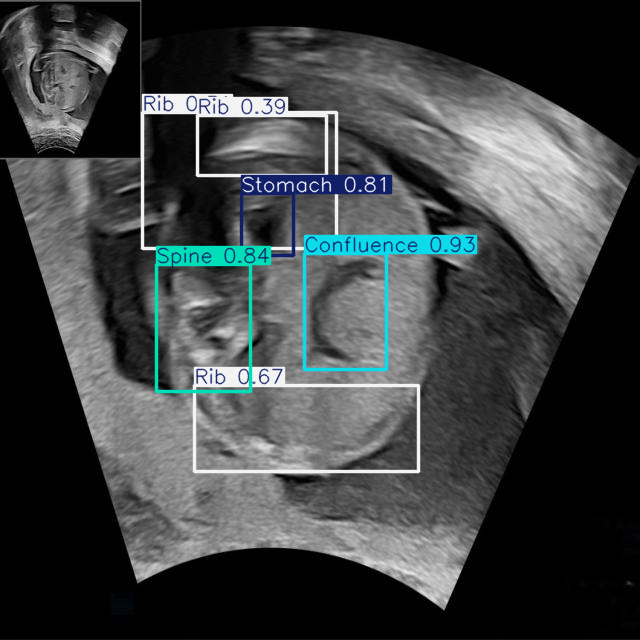

In [ ]:
results = model.predict(source = "/content/Abdomcirc-1/train/images/abdomcirc_000_jpg.rf.702f7b28cde586b054bbd07ffe4fd6e3.jpg", save = True)
for r in results:
  r.show()

In [ ]:
from google.colab import files

os.makedirs("/content/output_images", exist_ok = True)

# shutil.make_archive("output_images", 'zip', "/content/runs/detect/train")
# files.download("/content/runs/detect/train.zip")

shutil.make_archive("Abdomcirc-1", 'zip', "/content/Abdomcirc-1")
files.download("/content/Abdomcirc-1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run validation
results_ = model.val(data="/content/Abdomcirc-1/data.yaml")

# Extract metrics
precision = results_.box.p     # Precision for each class
recall = results_.box.r        # Recall for each class
map50 = results_.box.map50     # mAP@0.5
map = results_.box.map         # mAP@0.5:0.95

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("mAP@0.5:", map50)
print("mAP@0.5:0.95:", map)


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/Abdomcirc-1/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:18<00:00,  4.68s/it]


                   all         60        360      0.902      0.905      0.906      0.429
                 Aorta         60         60      0.922      0.867      0.929      0.377
            Confluence         60         60      0.975          1      0.995      0.618
                   Rib         60        120        0.7      0.758       0.72      0.262
                 Spine         60         60      0.915        0.9      0.891      0.308
               Stomach         60         60          1          1      0.995      0.583
Speed: 3.7ms preprocess, 297.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val4
Precision: [     0.9221     0.97525     0.69982     0.91527     0.99962]
Recall: [    0.86667           1     0.75768     0.90014           1]
mAP@0.5: 0.905912454867552
mAP@0.5:0.95: 0.4294131551203186


In [23]:
import os
from collections import Counter

def find_classes(folder_path):
    # Define the folder containing your YOLO label files
    folder_path = folder_path # input('Folder path: ')  # Change this to your folder path

    # Initialize a Counter to hold the counts of index values
    index_counter = Counter()

    # Use os.walk to traverse the directory
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.endswith('.txt'):
                file_path = os.path.join(dirpath, filename)
                with open(file_path, 'r') as file:
                    for line in file:
                        # Split the line into components and get the first digit (index)
                        parts = line.split()
                        if parts:  # Check if the line is not empty
                            index = int(parts[0])  # Convert the first part to an integer
                            index_counter[index] += 1  # Increment the count for this index

    # Print the occurrence count for each class name
    class_names = ['Aorta', 'Confluence', 'Rib', 'Spine', 'Stomach']
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {index_counter[i]}")

In [24]:
find_classes("/content/Abdomcirc-1/train")

Aorta: 493
Confluence: 495
Rib: 984
Spine: 491
Stomach: 493


In [25]:
find_classes("/content/Abdomcirc-1/valid")

Aorta: 60
Confluence: 60
Rib: 120
Spine: 60
Stomach: 60


In [26]:
find_classes("/content/Abdomcirc-1/test")

Aorta: 31
Confluence: 31
Rib: 62
Spine: 31
Stomach: 31
